# **Practical Exam Machine Learning Lab - Easy Task**
Done by: Siddharth Sudhakar (25901335)

Dataset: DS9 Advertising Spend vs Sales
https://www.kaggle.com/datasets/thorgodofthunder/tvradionewspaperadvertising

Task:
* Easy (Linear Regression) - DS9: Train/test split; MAE.
* Moderate (Gradient Descent) - DS9: Implement GD; show learning-rate sensitivity (3 eta
values).
* Hard (Closed-form vs GD) - DS9: Derive normal-equation solution using numpy (no sklearn).
Compare coefficients and MAE vs GD vs sklearn

## **Linear Regression Task**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [4]:
from sklearn.metrics import r2_score

In [5]:
data = pd.read_csv('Advertising.csv')

### **EDA**

In [6]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
data.shape

(200, 4)

In [9]:
data.isna().sum() # To check for missing values

,0
TV,0
Radio,0
Newspaper,0
Sales,0


<Axes: >

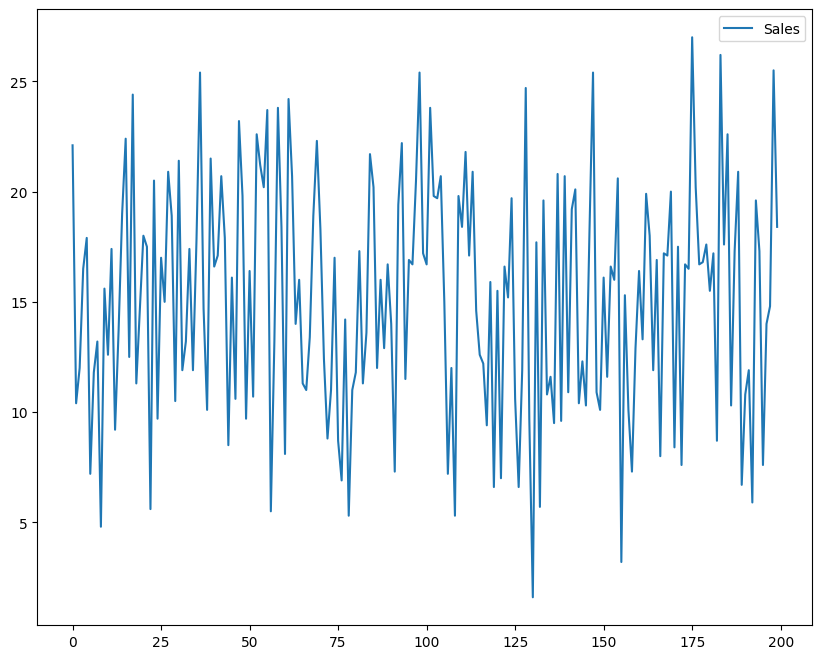

In [10]:
data.plot(kind='line', y='Sales', figsize=(10, 8))

<Axes: xlabel='Newspaper', ylabel='Sales'>

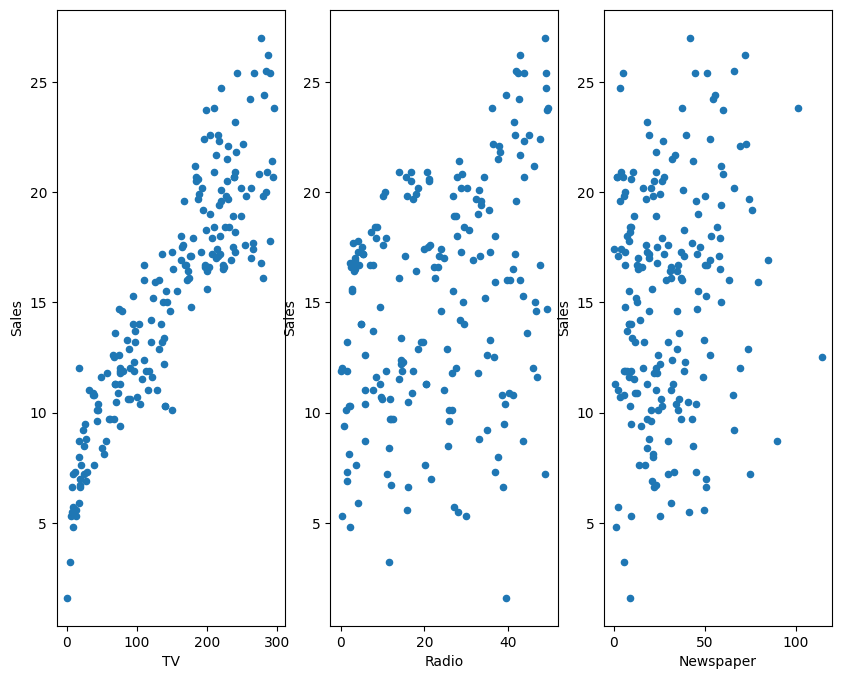

In [11]:
# Target distribution w.r.t. the features
fig, axs = plt.subplots(1, 3)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(10, 8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

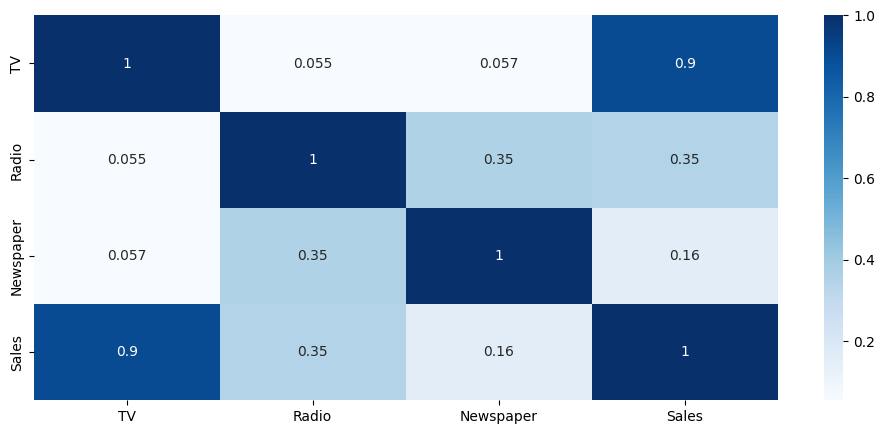

In [12]:
plt.figure(figsize=(12,5))
sns.heatmap(data.corr(),annot=True,cmap='Blues')
plt.show()

NOTE: From these two plots, it is clear that the 'TV' feature has a lot of importance in predicting the output and that the relationship between the TV feature and the target feature is suitable for Linear Regression analysis. Hence we will choose only this feature for the regression model.

### **Train-Test Split**

In [13]:
feature_col=['TV']
X = data[feature_col]
y = data.Sales

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

### **Training the Model**

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = model.predict(X_test)

### **Metrics & Conclusion**

In [17]:
model.intercept_

np.float64(7.007108428241848)

In [18]:
model.coef_

array([0.05548294])

In [19]:
mae=mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 1.9502948931650088


In [20]:
r2=r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.802561303423698


**Conclusion:** Hence, with an R2 score of 0.8 and an MAE of 1.95, the model is a strong fit to the given data.